In [2]:
# from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objs import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#import plotly
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='sfmaddox42', api_key='SOJVGjBN7E7orxpBFLlo')
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import os.path as op
indir='/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/Drug_response'


In [4]:
outdir = '/Users/smgroves/Documents/pycharm_workspace/mazebox/mazebox/examples/notebooks/bulk/'

In [5]:
distances = pd.read_csv(op.join(outdir,"arc_space/distances.csv"), header = None).T
distances.columns = ['SCLC-Y', 'SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
distances.head()

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,122.034899,107.833082,91.214260,93.282333,76.338367
1,122.334497,108.867795,95.302842,101.101440,77.636464
2,129.333514,112.065962,96.835822,101.923496,81.288051
3,129.561391,120.786395,98.340963,103.160870,83.854943
4,133.735308,122.521452,98.476548,103.607238,85.915890


In [6]:
clines = pd.read_csv(op.join(outdir,"arc_space/combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)
clines

,source,subtype,NEW_10_2020,10_08_2020
c.COLO668,CCLE,A2,A2,A2
c.CORL24,CCLE,A,N,A
c.CORL279,CCLE,A,A,A
c.CORL311,CCLE,P,P,P
c.CORL47,CCLE,A,A,A
...,...,...,...,...
m.NCIH82,Minna,N,N,uncl
m.NCIH841,Minna,Y,Y,Y
m.NCIH865,Minna,A2,A2,A2
m.NCIH889,Minna,A,A,A


In [7]:
distances

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,122.034899,107.833082,91.214260,93.282333,76.338367
1,122.334497,108.867795,95.302842,101.101440,77.636464
2,129.333514,112.065962,96.835822,101.923496,81.288051
3,129.561391,120.786395,98.340963,103.160870,83.854943
4,133.735308,122.521452,98.476548,103.607238,85.915890
...,...,...,...,...,...
115,230.207672,194.007225,200.779181,196.377092,201.213696
116,231.127419,194.539084,201.173412,197.162703,211.501952
117,233.494297,195.253940,202.721233,197.703672,212.431043
118,234.437324,200.957922,203.225613,198.392606,216.703075


In [8]:
ordering = pd.read_csv(op.join(outdir,"arc_space/ordering.csv"), header = None).T


In [9]:
#change from MATLAB to python indexing
ordering = ordering-1

In [10]:
for c in ordering:
    ordering[f"order_{c}"] = clines.index[list(ordering[c])]

In [11]:
ordering.columns = [0,1,2,3,4, 'SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

In [12]:
ordering

,0,1,2,3,4,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,37,33,54,50,90,c.NCIH2286,c.NCIH211,m.HCC4001,m.DMS153,m.NCIH2108
1,49,91,105,63,82,c.SW1271,m.NCIH211,m.NCIH524,m.NCIH1238,m.NCIH1926
2,18,106,107,8,71,c.NCIH1339,m.NCIH526,m.NCIH60,c.DMS153,m.NCIH1522
3,44,41,40,114,74,c.NCIH841,c.NCIH526,c.NCIH524,m.NCIH774,m.NCIH1672
4,116,60,59,29,89,m.NCIH841,m.NCIH1048,m.HCC970,c.NCIH2029,m.NCIH2107
...,...,...,...,...,...,...,...,...,...,...
115,4,1,49,37,46,c.CORL47,c.CORL24,c.SW1271,c.NCIH2286,c.SBC5
116,13,36,18,7,49,c.HCC33,c.NCIH2227,c.NCIH1339,c.DMS114,c.SW1271
117,15,12,75,49,37,c.NCIH1092,c.DMS79,m.NCIH1688,c.SW1271,c.NCIH2286
118,21,35,11,18,18,c.NCIH146,c.NCIH2196,c.DMS53,c.NCIH1339,c.NCIH1339


In [13]:
for c in distances:
    x = distances[c]
    x.index = ordering[c].values
    distances[c] = x.sort_index().values

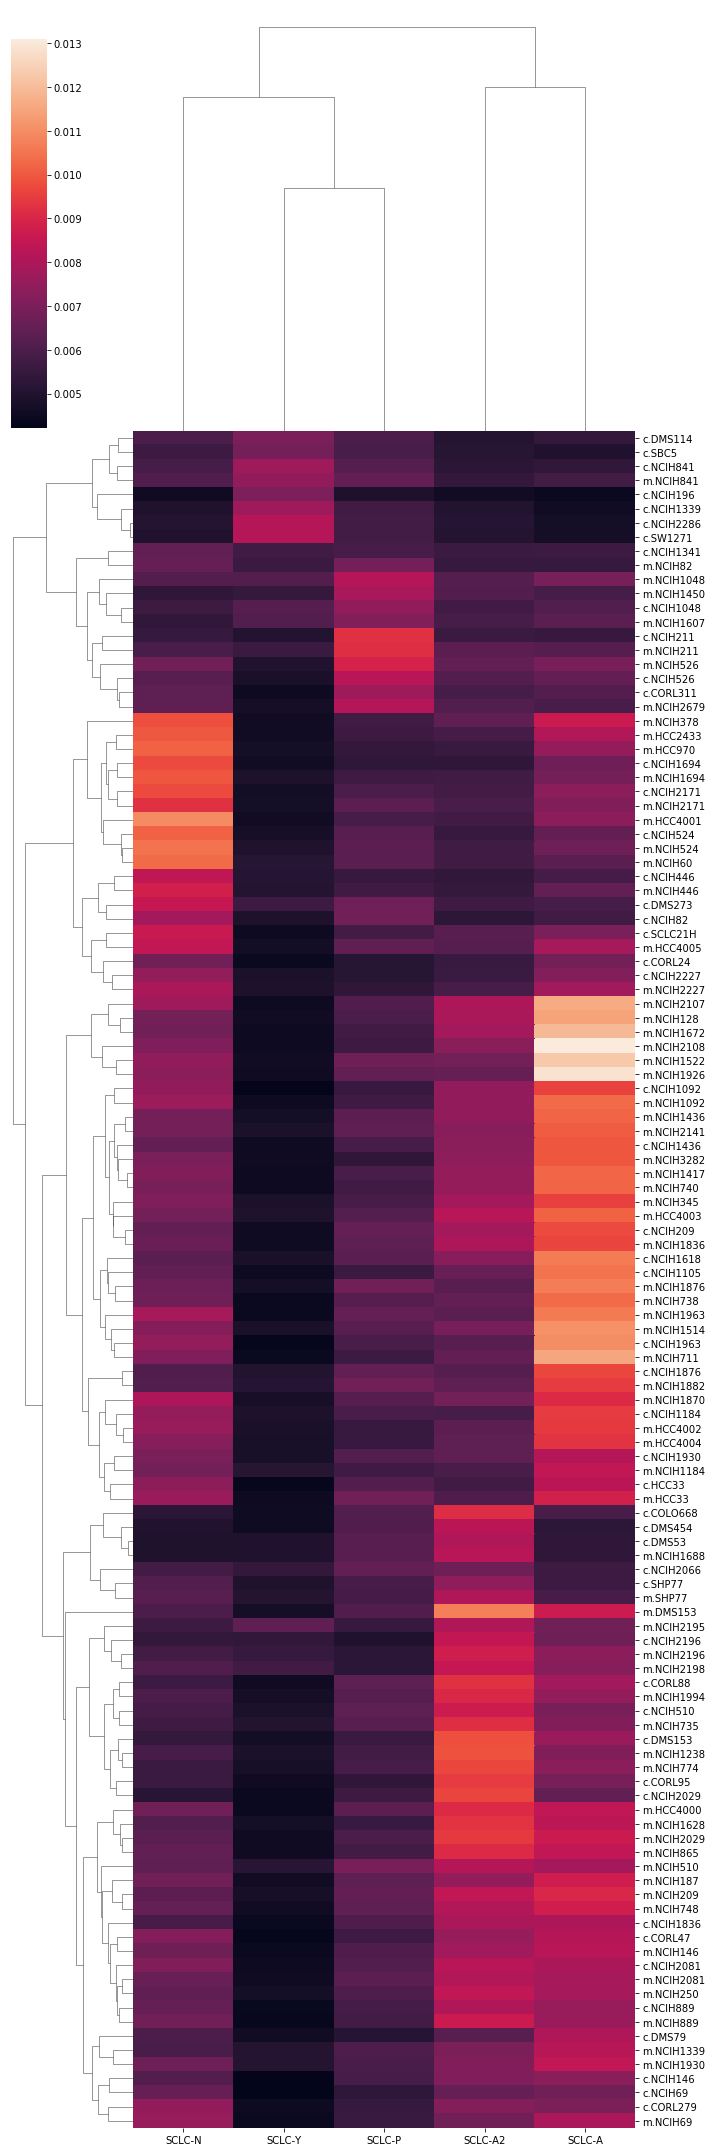

In [14]:
distances.index = clines.index
# for i,r in distances.iterrows():
#     print(i, r.sort_values().index.values)
sns.clustermap(1/distances, yticklabels = True, figsize = (10,30))

In [15]:
distances.loc[distances.min(axis = 1)>140]

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
c.CORL24,222.904409,194.007225,147.307784,179.723460,145.958027
c.DMS114,143.506320,166.348368,167.870446,197.162703,184.054165
c.NCIH1341,174.541664,169.016299,154.544885,178.412860,176.332192
c.NCIH196,141.782880,204.608804,218.141649,216.080333,223.981942
c.NCIH2066,184.457404,153.792635,172.523579,149.085408,177.722195
c.NCIH69,236.833498,187.824955,152.425468,152.541157,146.986937
c.SBC5,145.433444,168.450071,178.199310,194.844602,201.213696
m.NCIH82,178.272571,145.130066,152.464232,181.332542,182.733808


In [16]:
pcs = pd.read_csv(op.join(outdir,"arc_space/pc.csv"), header = None)
pcs.index = clines.index

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


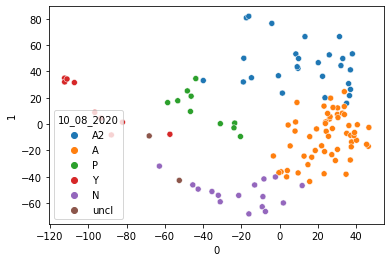

In [17]:
sns.scatterplot(pcs[0],pcs[1], hue = clines['10_08_2020'])

In [34]:
go = pd.read_csv('./arc_space/go.csv', header=0, index_col=0)
go.sort_values("P value (Mann-Whitney)")

,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
archetype #,,,,,,
SCLC-Y,GO PYRIMIDINE NUCLEOSIDE METABOLIC PROCESS,0.000039,0.78080,0.76899,1,1
SCLC-Y,GO PYRIMIDINE NUCLEOSIDE CATABOLIC PROCESS,0.000039,1.04110,1.00940,1,1
SCLC-Y,GO POSITIVE REGULATION OF ERAD PATHWAY,0.000039,0.64733,0.65648,1,1
SCLC-Y,GO POSITIVE REGULATION OF VASOCONSTRICTION,0.000039,0.75239,0.69292,1,1
SCLC-Y,GO NEGATIVE REGULATION OF CELL AGING,0.000041,0.75383,0.74928,1,1
...,...,...,...,...,...,...
SCLC-A,GO REGULATION OF DOUBLE STRAND BREAK REPAIR VI...,0.029747,0.26767,0.18330,1,1
SCLC-A2,GO INORGANIC ION IMPORT ACROSS PLASMA MEMBRANE,0.029747,0.20803,0.15231,1,1
SCLC-P,GO SMALL MOLECULE BIOSYNTHETIC PROCESS,0.029747,0.13044,0.11913,1,1


In [40]:
for i,r in go.iterrows():
    if "METAB" in r['Feature Name']:
        print(i, r[['Feature Name','P value (Mann-Whitney)']].values)
        

SCLC-A2 ['GO SEROTONIN METABOLIC PROCESS' 5.93e-05]
SCLC-A2 ['GO PRIMARY AMINO COMPOUND METABOLIC PROCESS' 9.81e-05]
SCLC-A2 ['GO AMMONIUM ION METABOLIC PROCESS' 0.00022370000000000002]
SCLC-A2 ['GO SPHINGOMYELIN METABOLIC PROCESS' 0.0009903]
SCLC-A2 ['GO REGULATION OF LIPOPROTEIN METABOLIC PROCESS' 0.0021804000000000003]
SCLC-A2 ['GO TOXIN METABOLIC PROCESS' 0.0011741]
SCLC-A2 ['GO NEUROTRANSMITTER METABOLIC PROCESS' 0.00040918]
SCLC-A2 ['GO INDOLALKYLAMINE METABOLIC PROCESS' 0.0018542]
SCLC-A2 ['GO DOPAMINE METABOLIC PROCESS' 0.0025586]
SCLC-A2 ['GO POLY N ACETYLLACTOSAMINE METABOLIC PROCESS' 0.0045725]
SCLC-A2 ['GO GLYCOSPHINGOLIPID METABOLIC PROCESS' 0.0016396000000000002]
SCLC-A2 ['GO VITAMIN D METABOLIC PROCESS' 0.0035004]
SCLC-A2 ['GO INDOLE CONTAINING COMPOUND METABOLIC PROCESS' 0.0018542]
SCLC-A2 ['GO CELLULAR BIOGENIC AMINE METABOLIC PROCESS' 0.00023453]
SCLC-A2 ['GO DRUG METABOLIC PROCESS' 0.0094624]
SCLC-A2 ['GO REGULATION OF POLYSACCHARIDE METABOLIC PROCESS' 0.002094300000

The go terms below are the ones I picked out for the table in the manuscript.

In [31]:
gos = pd.read_csv('./arc_space/gos.csv', header=0)
# go.sort_values("P value (Mann-Whitney)")

In [32]:
gos['logp'] = np.log10(gos['P-Value'])

In [33]:
gos

,Enriched Gene Sets,Log-Mean Difference,P-Value,Archetype,logp
0,Forebrain neuron fate commitment,0.77700,0.004700,SCLC-A,-2.327902
1,Thalamus development,0.36300,0.008500,SCLC-A,-2.070581
2,Regulation of long-term synaptic depression,0.55940,0.004700,SCLC-A,-2.327902
3,Positive regulation of oligodendrocyte differe...,0.29700,0.017000,SCLC-A,-1.769551
4,Dendritic transport,0.25600,0.017000,SCLC-A,-1.769551
5,G0 to G1 transition,0.18500,0.003200,SCLC-A,-2.494850
6,Histamine secretion,0.74000,0.000270,SCLC-A2,-3.568636
7,CD8+ Alpha Beta T Cell Differentiation,0.66100,0.000170,SCLC-A2,-3.769551
8,Detection of other organism,0.64100,0.000410,SCLC-A2,-3.387216
9,Tolerance induction,0.60400,0.005700,SCLC-A2,-2.244125


In [26]:
hallmark_expr = pd.read_csv('./arc_space/hallmarks_expression.csv', header=0, index_col = 0)
hallmark_expr

,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_HEME_METABOLISM,HALLMARK_COAGULATION,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS
c.COLO668,2.934432,3.645312,5.017617,4.511493,3.336807,3.888540,2.190798,5.179710,5.439689,3.808790,...,3.846141,2.293802,2.923726,3.124711,4.370263,2.403852,2.889350,2.536196,1.415137,3.390660
c.CORL24,2.500774,3.933067,4.673492,4.732706,3.615168,4.096003,2.088617,5.056342,5.453408,3.730008,...,3.952497,2.152716,2.983832,3.143986,4.239784,2.261330,3.526775,2.219085,2.093774,3.209946
c.CORL279,2.702296,4.003144,4.862216,4.787436,3.589288,3.987987,2.151788,5.051927,5.469975,3.807439,...,4.031095,2.072579,3.215276,3.038011,4.337244,2.369122,3.333500,2.350105,1.688865,4.317217
c.CORL311,2.286375,3.404849,4.611723,4.721954,3.565339,3.665893,1.971366,5.287007,5.600016,3.493346,...,3.818620,1.827197,2.696426,2.907668,4.230881,2.250420,2.911317,1.934471,1.268209,2.220893
c.CORL47,2.643213,3.814697,4.755754,4.415625,3.140211,3.929492,1.843416,5.299168,5.509422,3.643576,...,3.725347,1.775173,2.666721,2.942041,4.209294,2.218518,2.936402,2.192025,1.580818,3.713519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m.NCIH82,2.324174,3.375072,4.453593,4.616897,3.521406,3.753643,2.045752,5.301158,5.610325,3.859177,...,4.061365,2.468517,2.851242,2.912324,4.358932,2.418034,2.940444,1.912421,1.479878,2.186015
m.NCIH841,2.619069,3.373352,4.420194,5.012223,3.761688,4.322753,2.266435,5.195585,5.822254,3.678429,...,3.899002,2.347908,3.033457,2.855469,4.173257,2.517605,3.119052,1.808044,1.410044,1.787041
m.NCIH865,2.452378,3.571030,4.508947,4.755590,3.247118,4.049960,1.969254,5.157620,5.484841,3.709933,...,3.896030,2.067124,2.836450,3.019554,4.245257,2.195534,3.214567,2.228103,1.564578,3.596731
m.NCIH889,2.600395,3.626046,4.564419,4.367839,3.295720,3.665247,1.876273,5.214404,5.329714,3.712231,...,3.813735,1.883297,2.778373,2.921071,4.078757,2.178718,3.176072,2.284348,1.448632,3.597536


In [26]:
hallmark_sig= pd.read_csv('./arc_space/Bulk_hallmarks_50_continuous_All.csv', header=0)
hallmark_sig.head()


,archetype #,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
0,1,HALLMARK EPITHELIAL MESENCHYMAL TRANSITION,0.000132,1.44900,1.37770,1,1
1,1,HALLMARK INTERFERON ALPHA RESPONSE,0.001448,1.08200,0.89376,1,1
2,1,HALLMARK TNFA SIGNALING VIA NFKB,0.001389,1.06310,0.95065,1,1
3,1,HALLMARK TGF BETA SIGNALING,0.001448,0.94940,0.70714,1,1
4,1,HALLMARK IL6 JAK STAT3 SIGNALING,0.000870,0.92154,0.76599,1,1


In [28]:
hallmark_sig_df = hallmark_sig.pivot(index='Feature Name', columns='archetype #', values='P value (Mann-Whitney)')

In [29]:
hallmark_sig_df.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

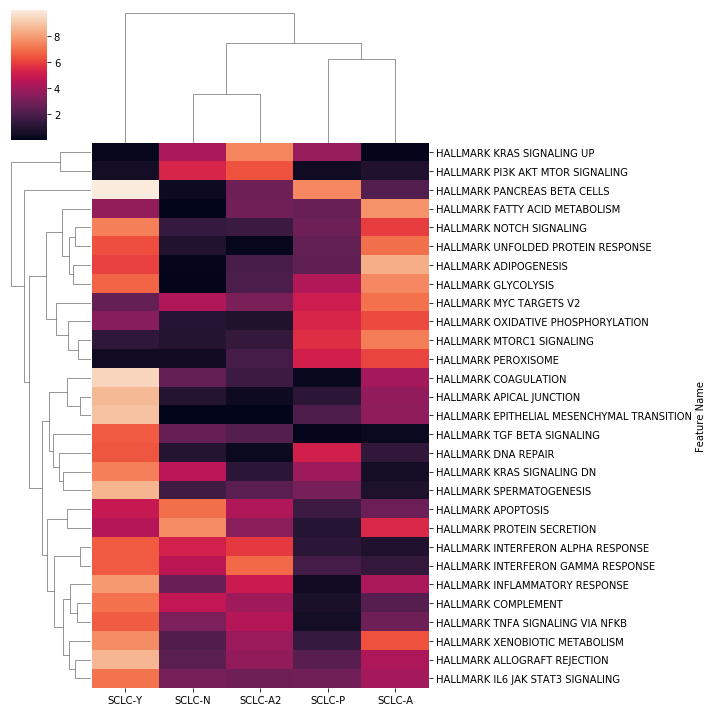

In [47]:
sns.clustermap(-np.log(hallmark_sig_df)[(-np.log(hallmark_sig_df).min(1)>6)])

In [55]:
cancer_hallmark_sig= pd.read_csv('./arc_space/Bulk_hallmarks_continuous_All.csv', header=0)
cancer_hallmark_sig = cancer_hallmark_sig.loc[cancer_hallmark_sig['Mean Difference']>0]
cancer_hallmark_sig


,archetype #,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
0,1,Inducing Angiogenesis,0.000003,0.352770,0.359090,1,1
1,1,Resisting Cell Death,0.000002,0.289980,0.269270,1,1
2,1,Evading Immune Destruction,0.000430,0.212910,0.203540,1,1
3,1,Genome Instability and Mutation,0.000052,0.201380,0.209530,1,1
4,1,Sustaining Proliferative Signaling,0.000048,0.201290,0.178920,1,1
5,1,Evading Growth Suppressors,0.000061,0.194850,0.184970,1,1
6,1,Tumor-Promoting Inflammation,0.000204,0.188330,0.192200,1,1
7,1,Enabling Replicative Immortality,0.000065,0.183220,0.159240,1,1
8,1,Activating Invasion and Metastasis,0.000656,0.160080,0.149330,1,1
9,1,Reprogramming Energy Metabolism,0.000377,0.142850,0.140350,1,1


In [56]:
cancer_hallmark_sig = cancer_hallmark_sig.pivot(index='Feature Name', columns='archetype #', values='P value (Mann-Whitney)')

In [59]:
cancer_hallmark_sig.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2']

In [62]:
cancer_hallmark_sig

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2
Feature Name,,,,
Activating Invasion and Metastasis,0.000656,NaN,NaN,0.454500
Enabling Replicative Immortality,0.000065,0.608830,NaN,0.677760
Evading Growth Suppressors,0.000061,0.393710,NaN,NaN
Evading Immune Destruction,0.000430,0.082489,NaN,0.000678
Genome Instability and Mutation,0.000052,0.000541,NaN,NaN
Inducing Angiogenesis,0.000003,0.031059,NaN,0.015203
Reprogramming Energy Metabolism,0.000377,0.002979,0.68418,0.333730
Resisting Cell Death,0.000002,0.095625,NaN,0.045624
Sustaining Proliferative Signaling,0.000048,0.250010,NaN,0.762810


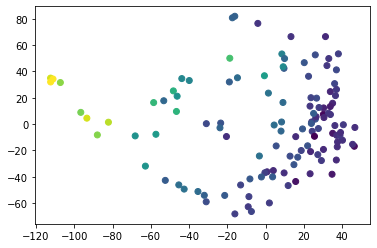

In [64]:
plt.scatter(pcs[0],pcs[1], c = distances['SCLC-Y'], cmap='viridis_r')

In [69]:
hallmark_expr

,'HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_HYPOXIA','HALLMARK_CHOLESTEROL_HOMEOSTASIS','HALLMARK_MITOTIC_SPINDLE','HALLMARK_WNT_BETA_CATENIN_SIGNALING','HALLMARK_TGF_BETA_SIGNALING','HALLMARK_IL6_JAK_STAT3_SIGNALING','HALLMARK_DNA_REPAIR','HALLMARK_G2M_CHECKPOINT','HALLMARK_APOPTOSIS',...,'HALLMARK_HEME_METABOLISM','HALLMARK_COAGULATION','HALLMARK_IL2_STAT5_SIGNALING','HALLMARK_BILE_ACID_METABOLISM','HALLMARK_PEROXISOME','HALLMARK_ALLOGRAFT_REJECTION','HALLMARK_SPERMATOGENESIS','HALLMARK_KRAS_SIGNALING_UP','HALLMARK_KRAS_SIGNALING_DN','HALLMARK_PANCREAS_BETA_CELLS'
0,2.934432,3.645312,5.017617,4.511493,3.336807,3.888540,2.190798,5.179710,5.439689,3.808790,...,3.846141,2.293802,2.923726,3.124711,4.370263,2.403852,2.889350,2.536196,1.415137,3.390660
1,2.500774,3.933067,4.673492,4.732706,3.615168,4.096003,2.088617,5.056342,5.453408,3.730008,...,3.952497,2.152716,2.983832,3.143986,4.239784,2.261330,3.526775,2.219085,2.093774,3.209946
2,2.702296,4.003144,4.862216,4.787436,3.589288,3.987987,2.151788,5.051927,5.469975,3.807439,...,4.031095,2.072579,3.215276,3.038011,4.337244,2.369122,3.333500,2.350105,1.688865,4.317217
3,2.286375,3.404849,4.611723,4.721954,3.565339,3.665893,1.971366,5.287007,5.600016,3.493346,...,3.818620,1.827197,2.696426,2.907668,4.230881,2.250420,2.911317,1.934471,1.268209,2.220893
4,2.643213,3.814697,4.755754,4.415625,3.140211,3.929492,1.843416,5.299168,5.509422,3.643576,...,3.725347,1.775173,2.666721,2.942041,4.209294,2.218518,2.936402,2.192025,1.580818,3.713519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2.324174,3.375072,4.453593,4.616897,3.521406,3.753643,2.045752,5.301158,5.610325,3.859177,...,4.061365,2.468517,2.851242,2.912324,4.358932,2.418034,2.940444,1.912421,1.479878,2.186015
116,2.619069,3.373352,4.420194,5.012223,3.761688,4.322753,2.266435,5.195585,5.822254,3.678429,...,3.899002,2.347908,3.033457,2.855469,4.173257,2.517605,3.119052,1.808044,1.410044,1.787041
117,2.452378,3.571030,4.508947,4.755590,3.247118,4.049960,1.969254,5.157620,5.484841,3.709933,...,3.896030,2.067124,2.836450,3.019554,4.245257,2.195534,3.214567,2.228103,1.564578,3.596731
118,2.600395,3.626046,4.564419,4.367839,3.295720,3.665247,1.876273,5.214404,5.329714,3.712231,...,3.813735,1.883297,2.778373,2.921071,4.078757,2.178718,3.176072,2.284348,1.448632,3.597536


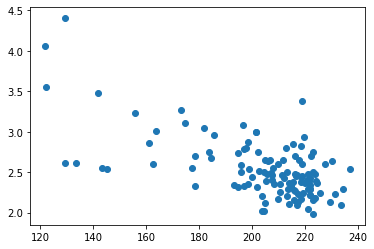

In [74]:
plt.scatter(x = distances['SCLC-Y'], y = hallmark_expr['HALLMARK_TNFA_SIGNALING_VIA_NFKB'])

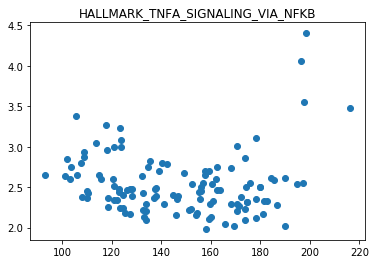

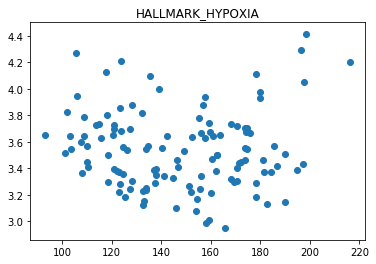

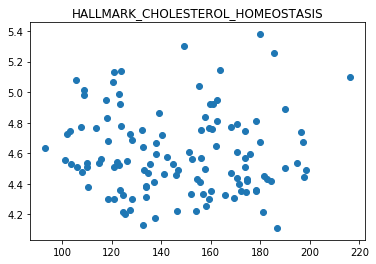

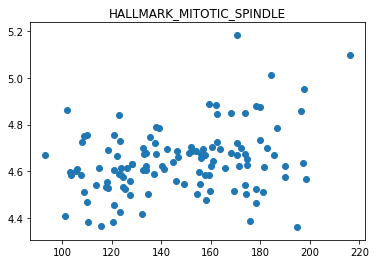

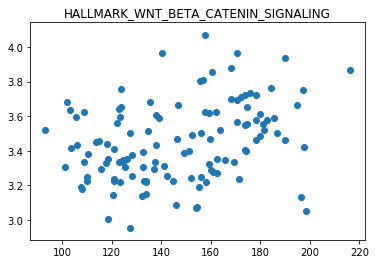

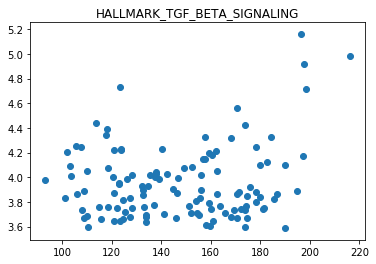

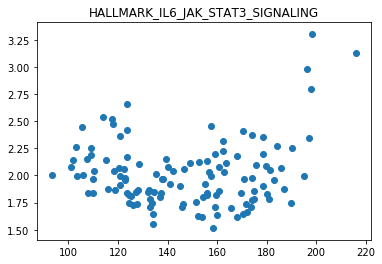

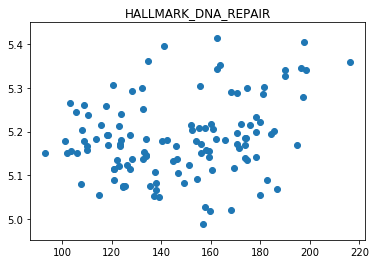

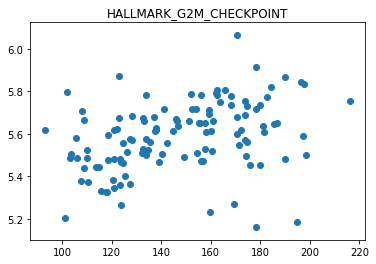

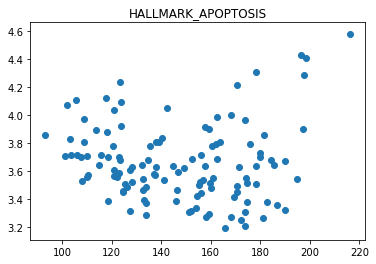

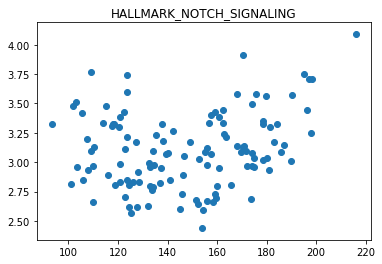

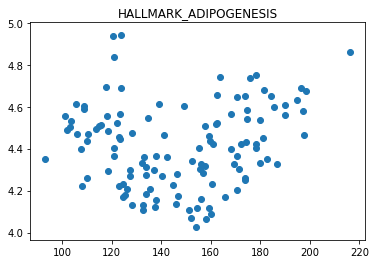

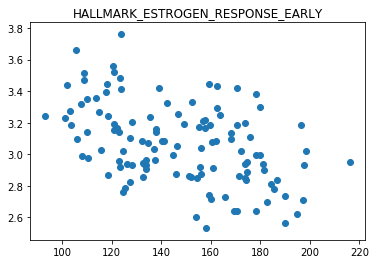

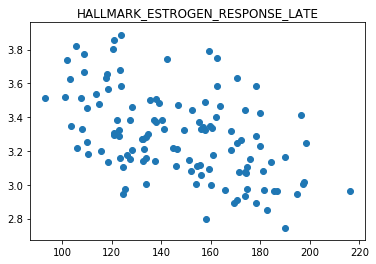

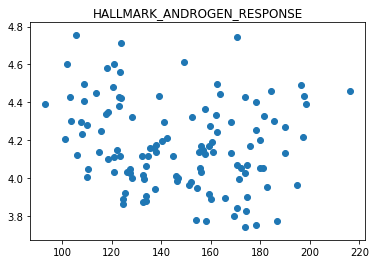

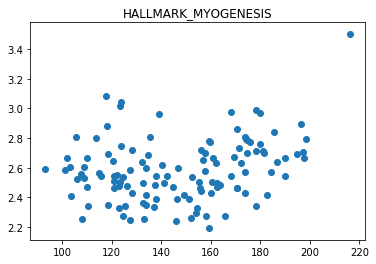

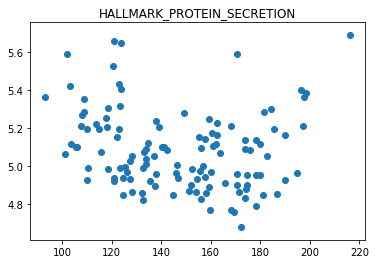

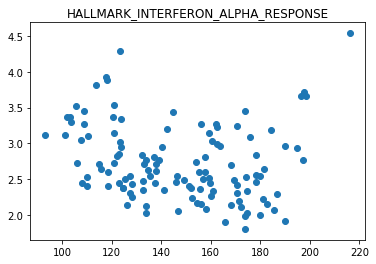

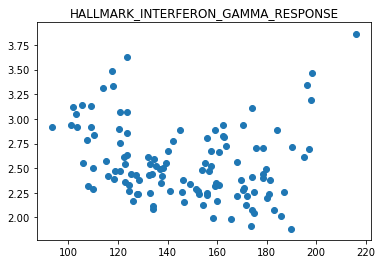

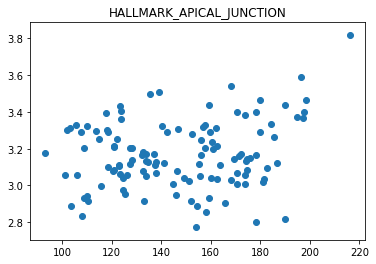

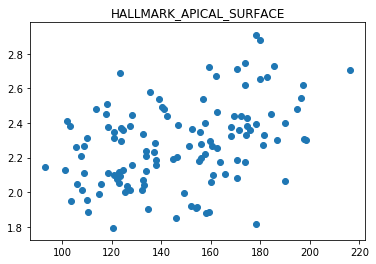

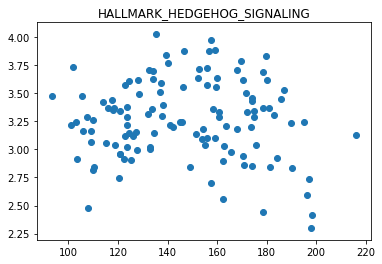

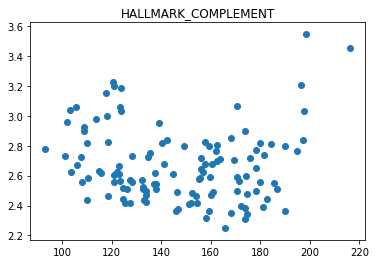

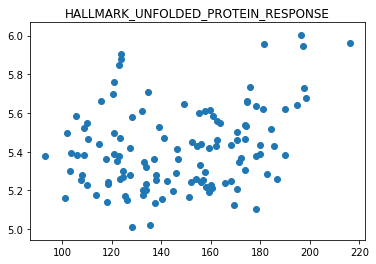

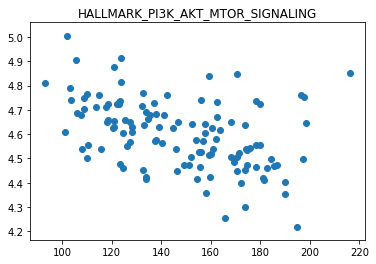

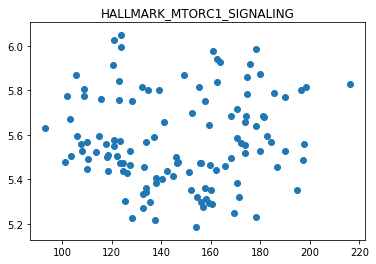

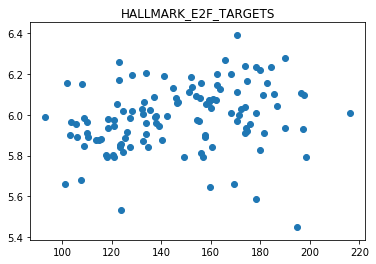

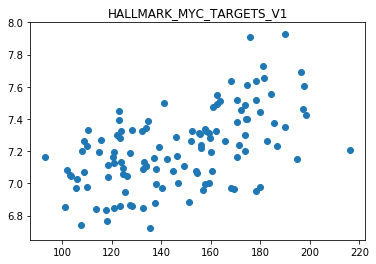

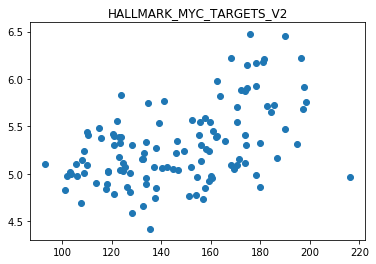

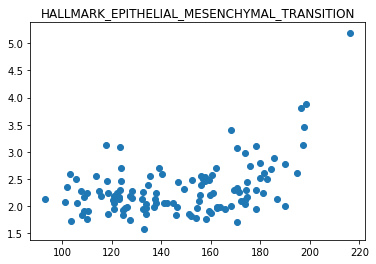

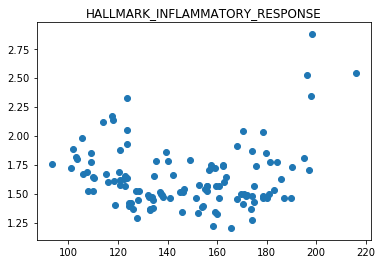

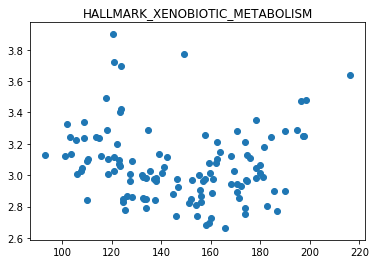

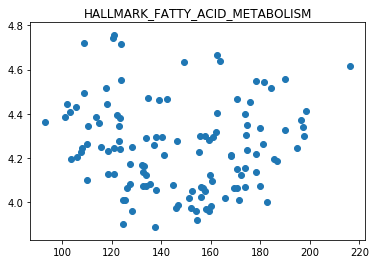

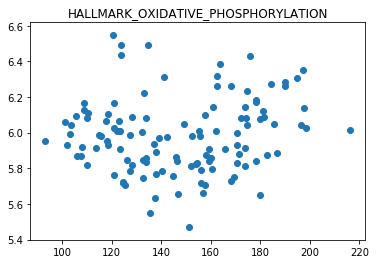

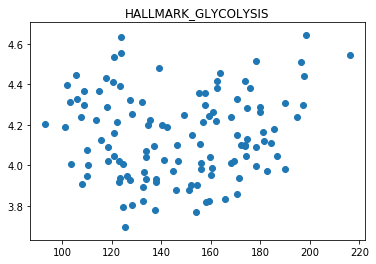

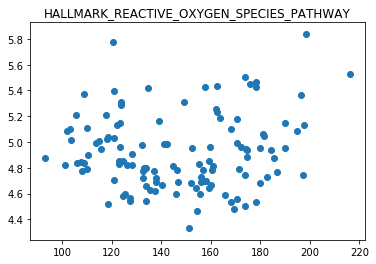

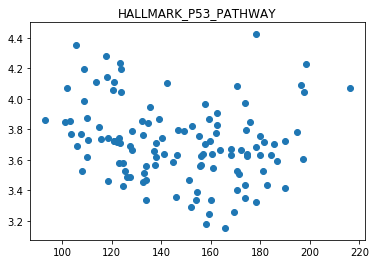

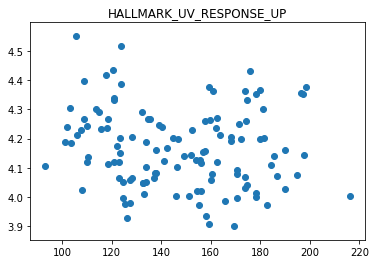

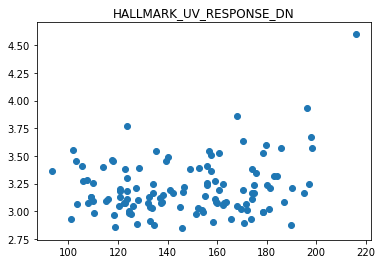

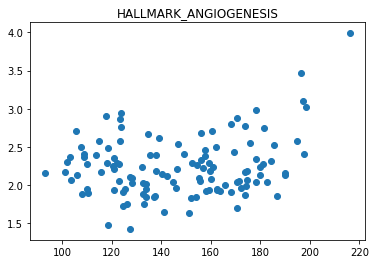

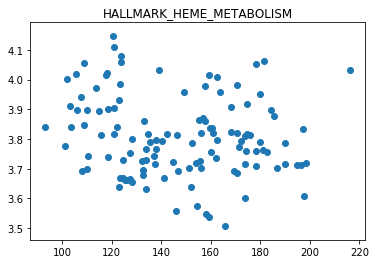

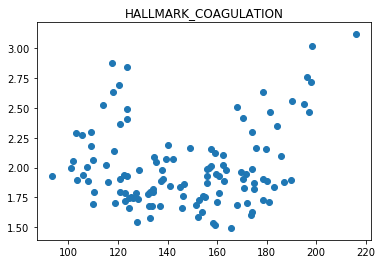

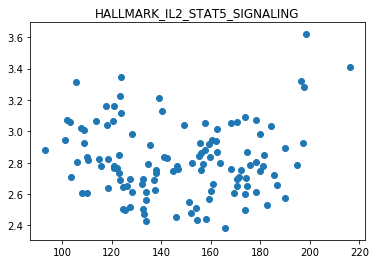

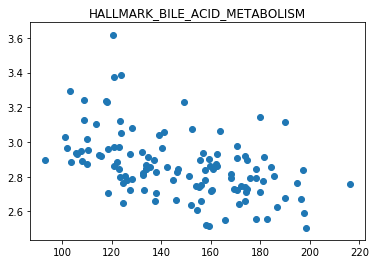

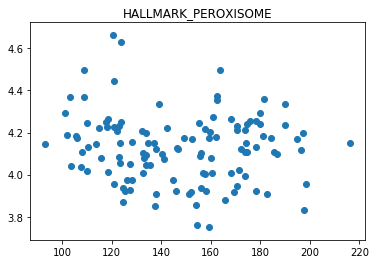

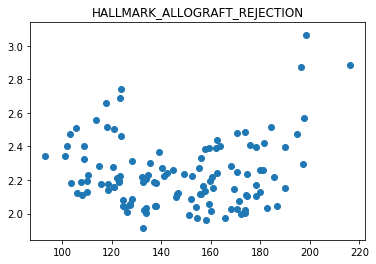

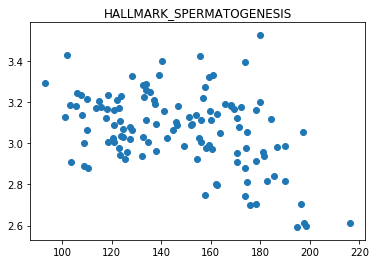

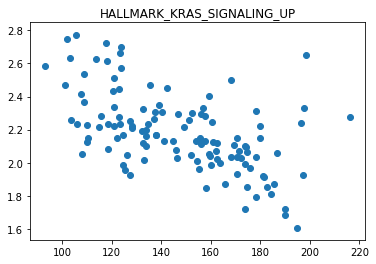

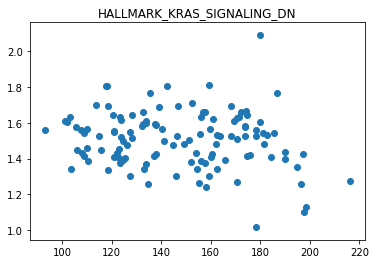

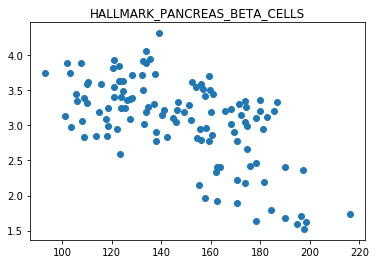

<Figure size 432x288 with 0 Axes>

In [78]:
for i in hallmark_expr:
    plt.scatter(x = distances['SCLC-A2'], y = hallmark_expr[i])
    plt.title(i)
    plt.show()
    plt.clf()

In [80]:
hallmark_expr = pd.read_csv('./arc_space/cancer_hallmarks_expr.csv', header=0, index_col=0)
hallmark_expr

,Activating Invasion and Metastasis,Enabling Replicative Immortality,Evading Growth Suppressors,Evading Immune Destruction,Genome Instability and Mutation,Inducing Angiogenesis,Reprogramming Energy Metabolism,Resisting Cell Death,Sustaining Proliferative Signaling,Tumor-Promoting Inflammation
c.COLO668,2.816597,2.803045,2.999301,2.550213,3.400991,2.327552,4.002020,3.113106,2.885992,2.871126
c.CORL24,3.113756,3.125881,3.372271,2.332579,3.247049,2.489248,4.069540,3.072382,3.149564,2.850910
c.CORL279,3.013221,3.016233,3.222122,2.357655,3.366684,2.374578,4.172441,3.194103,3.103624,2.813947
c.CORL311,2.682575,2.721228,2.976569,2.223798,3.201471,2.059659,4.029873,2.895010,2.793553,2.606501
c.CORL47,2.750171,2.955743,3.123135,2.165257,3.300442,2.100192,3.915718,2.973802,2.849060,2.606678
...,...,...,...,...,...,...,...,...,...,...
m.NCIH82,2.791140,2.999248,3.123662,2.233056,3.450303,2.325576,4.023000,3.030438,2.923986,2.657176
m.NCIH841,2.848229,3.100288,3.212152,2.363216,3.526334,2.315627,4.157746,3.111083,3.010734,2.752228
m.NCIH865,2.877757,3.004707,3.062410,2.327711,3.208466,2.237384,3.992109,3.034146,2.900245,2.755249
m.NCIH889,2.789752,2.872994,3.023827,2.123204,3.395712,2.130656,3.924191,2.971713,2.850882,2.572057


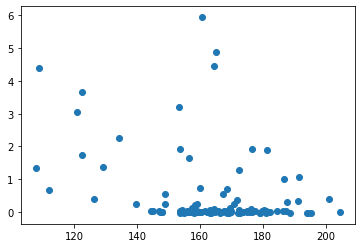

In [30]:
data = pd.read_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T
plt.scatter(x = distances['SCLC-P'], y = data['SUCNR1'])


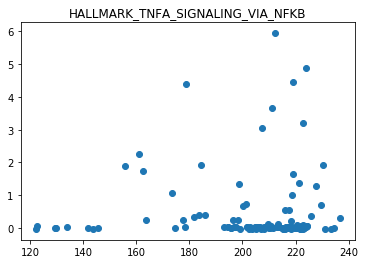

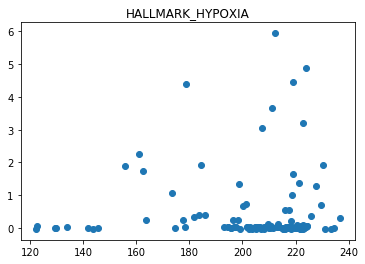

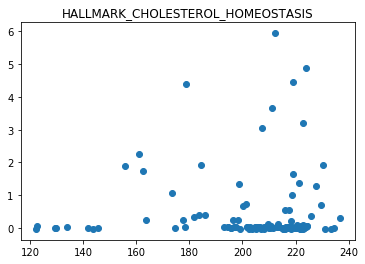

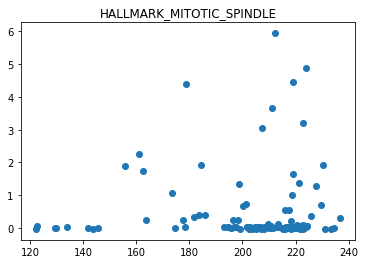

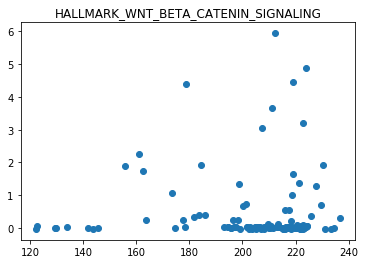

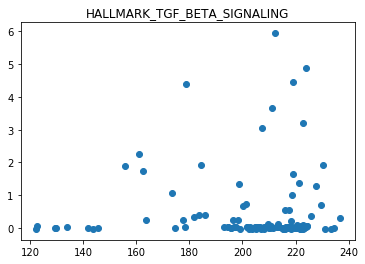

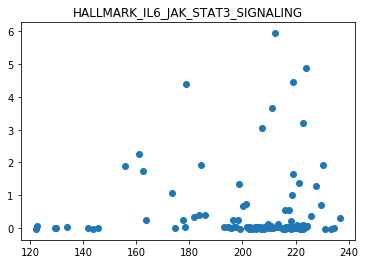

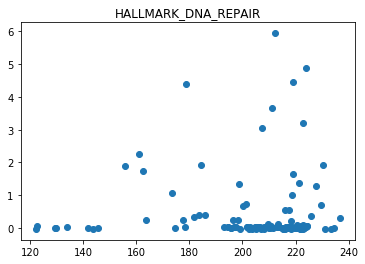

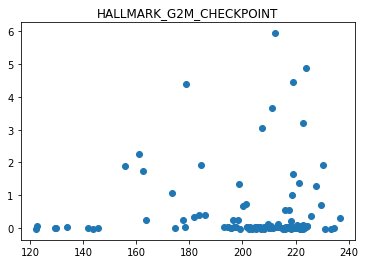

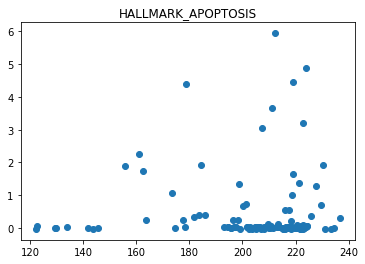

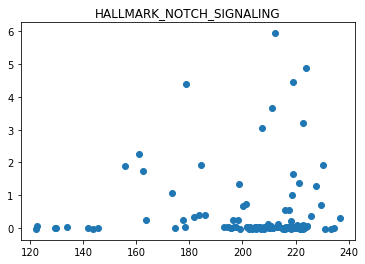

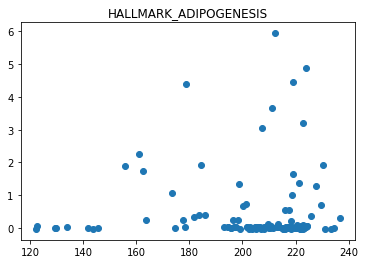

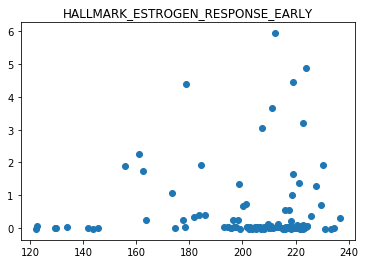

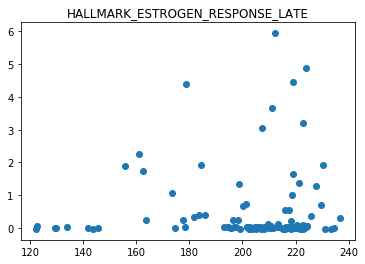

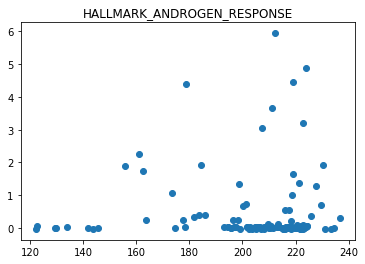

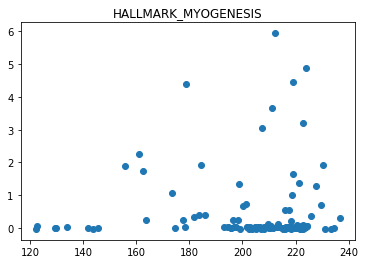

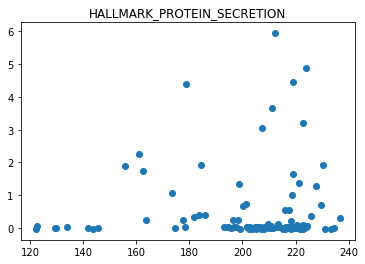

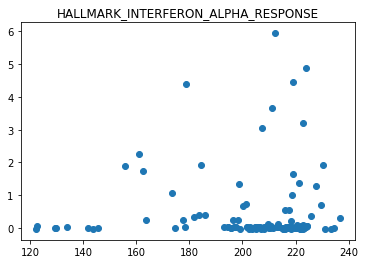

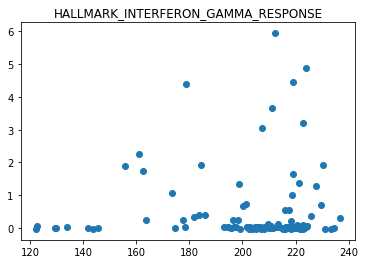

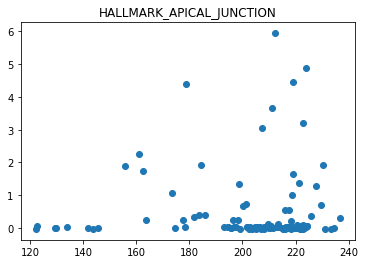

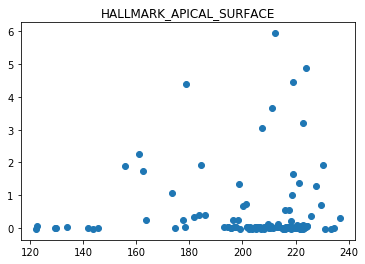

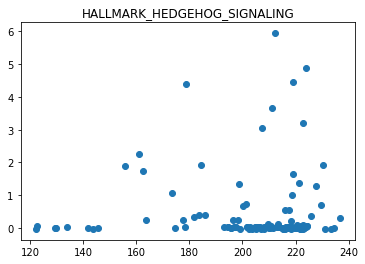

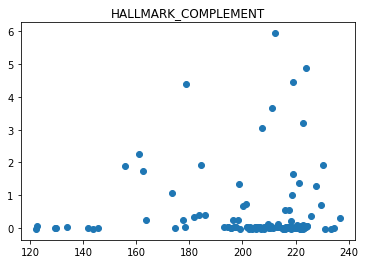

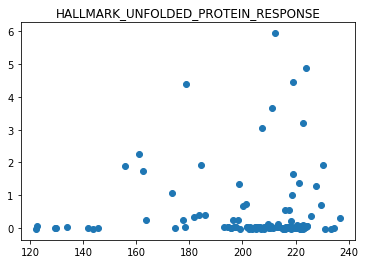

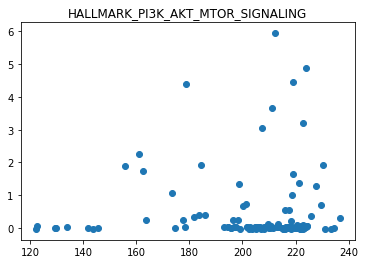

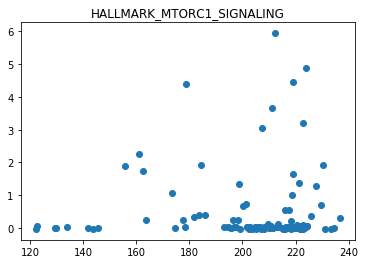

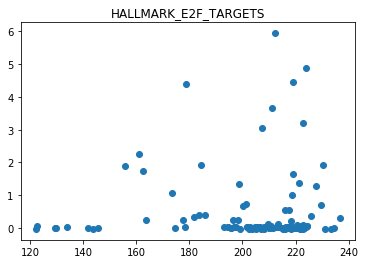

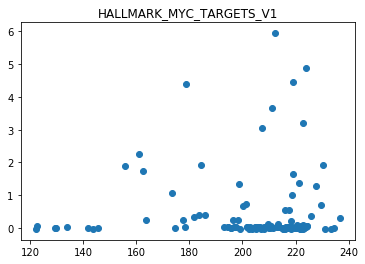

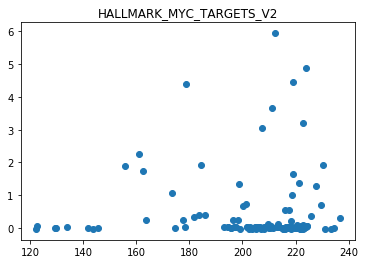

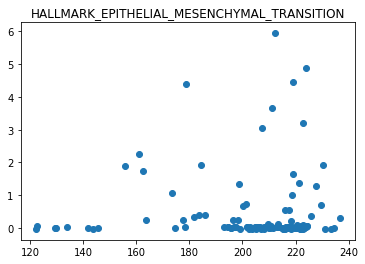

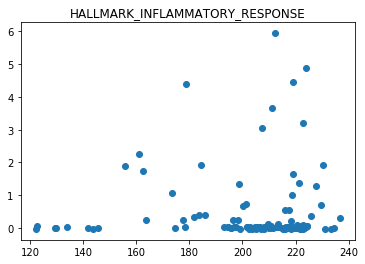

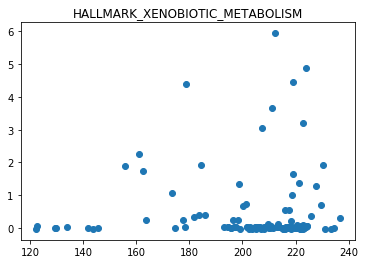

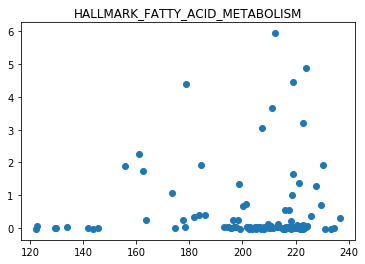

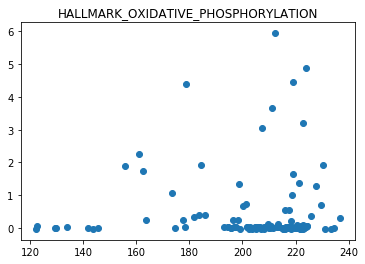

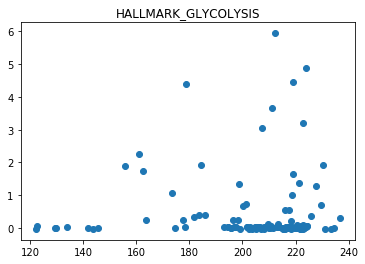

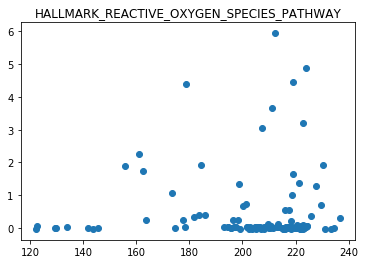

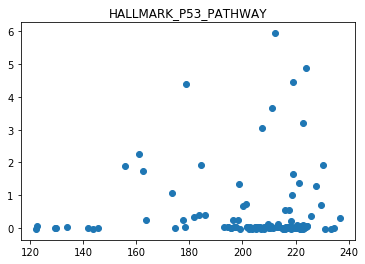

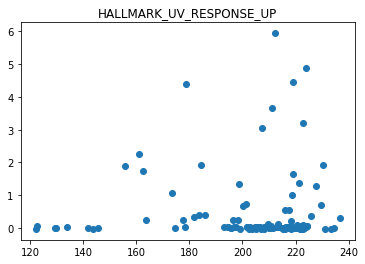

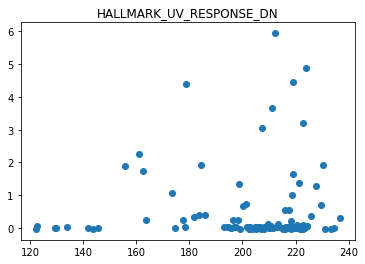

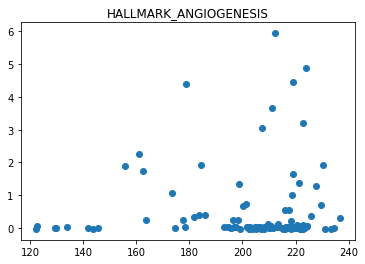

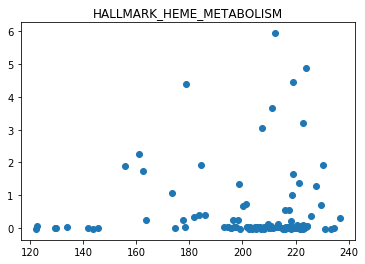

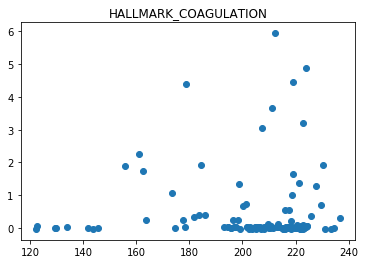

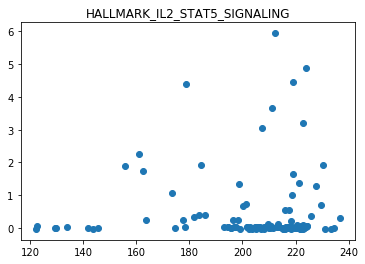

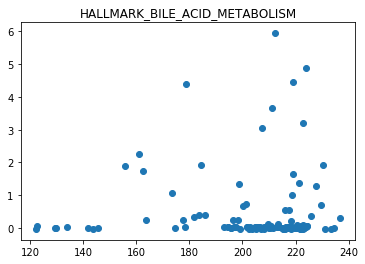

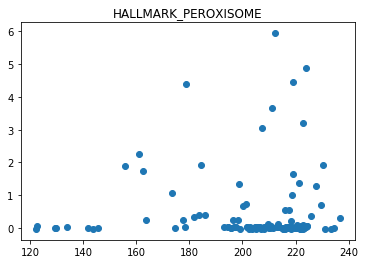

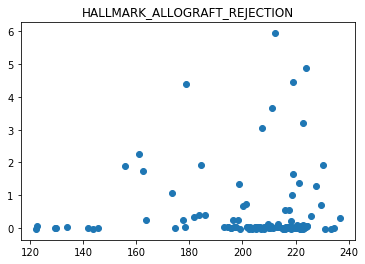

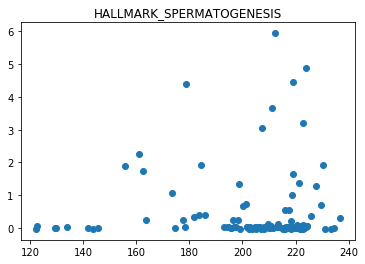

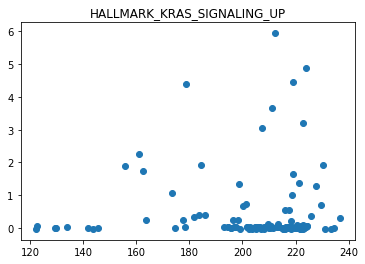

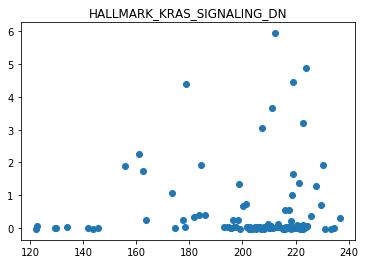

KeyboardInterrupt: 

In [29]:
for i in hallmark_expr:
    plt.scatter(x = distances['SCLC-Y'], y = hallmark_expr[i])
    plt.title(i)
    plt.show()
    plt.clf()

In [ ]:
plt.scatter(pcs[0],pcs[1], c = distances['SCLC-Y'], cmap='viridis_r')

In [41]:
!pip install gprofiler


In [42]:
from gprofiler import gprofiler

In [45]:
gprofiler

<function gprofiler.gprofiler(query, organism='hsapiens', ordered_query=False, significant=True, exclude_iea=False, region_query=False, max_p_value=1.0, max_set_size=0, correction_method='analytical', hier_filtering='none', domain_size='annotated', custom_bg=[], numeric_ns='', no_isects=False, png_fn=None, include_graph=False, src_filter=None)>

In [48]:
go_all = pd.read_csv('./arc_space/c5_continuous_All.csv', header = 0, index_col = None)



In [49]:
go_all

,archetype #,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
0,1,GO MEMBRANE RAFT ASSEMBLY,0.000084,2.59240,2.29350,1,1
1,1,GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...,0.000700,1.86510,1.61620,1,1
2,1,GO BLEB ASSEMBLY,0.000152,1.80950,1.65200,1,1
3,1,GO RESPONSE TO INTERFERON ALPHA,0.000145,1.67550,1.48310,1,1
4,1,GO POSITIVE REGULATION BY SYMBIONT OF ENTRY IN...,0.000325,1.57450,1.28280,1,1
...,...,...,...,...,...,...,...
26120,5,GO REGULATION OF HORMONE BIOSYNTHETIC PROCESS,0.042464,-0.39244,-0.31896,0,0
26121,5,GO RESPONSE TO EPINEPHRINE,0.064555,-0.42539,-0.30409,0,0
26122,5,GO HEART INDUCTION,0.054786,-0.44985,-0.31392,0,0
26123,5,GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...,0.143470,-0.45376,-0.46622,0,0


In [151]:
go_all.sort_values(['Is first bin maximal?','Mean Difference'], ascending = [False, False]).loc[go_all['archetype #']==5]



,archetype #,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
20900,5,GO FOREBRAIN NEURON FATE COMMITMENT,0.004748,0.66148,0.77767,1,1
20902,5,GO REGULATION OF LONG TERM SYNAPTIC DEPRESSION,0.004748,0.58625,0.55940,1,1
20903,5,GO NEGATIVE REGULATION OF EXCITATORY POSTSYNAP...,0.004081,0.56898,0.52536,1,1
20904,5,GO CARDIAC CELL FATE COMMITMENT,0.004929,0.53356,0.49408,1,1
20901,5,GO CEREBELLAR GRANULAR LAYER DEVELOPMENT,0.006156,0.60869,0.48932,1,1
...,...,...,...,...,...,...,...
22286,5,GO REGULATION OF CELL CELL ADHESION MEDIATED B...,0.000731,-0.61238,-0.58704,1,0
22272,5,GO REGULATION OF PLASMINOGEN ACTIVATION,0.001389,-0.48301,-0.59850,1,0
22224,5,GO POSITIVE REGULATION BY SYMBIONT OF ENTRY IN...,0.003781,-0.39769,-0.61472,1,0
26124,5,GO ANTIGEN PROCESSING AND PRESENTATION OF ENDO...,0.097790,-0.79585,-0.64033,0,0


In [148]:
s = "GO Forebrain neuron fate commitment"
s = s.upper()

In [152]:
go_table = go_all.pivot(index = 'Feature Name', columns='archetype #', values = 'Mean Difference')


In [155]:
enriched = []
for i in range(5):
    for j in go_table.sort_values(i+1, ascending = False).head(20).index:
        enriched.append(j)



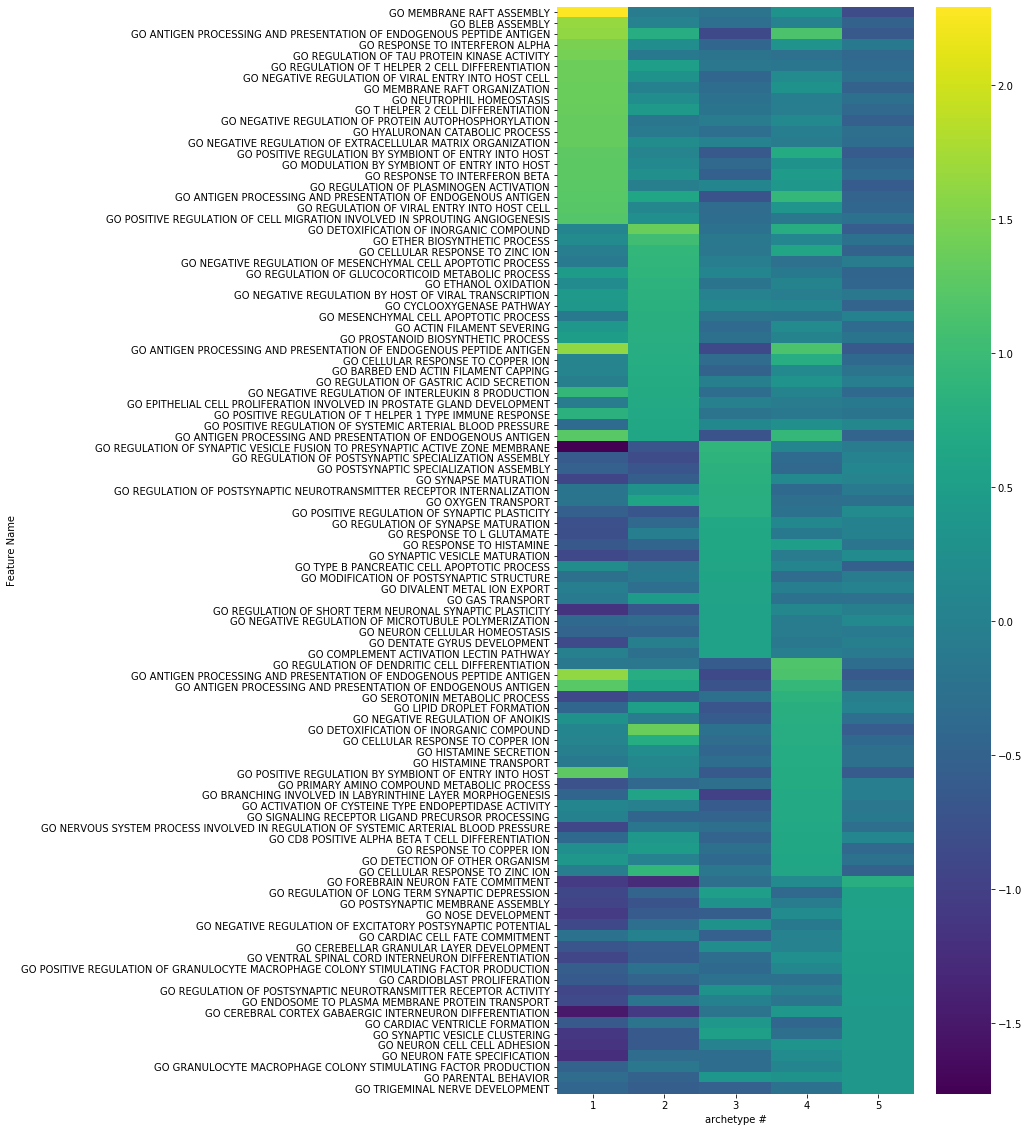

In [161]:
plt.figure(figsize = (8,20))
sns.heatmap(go_table.loc[enriched], cmap="viridis")

In [75]:
arc = pd.read_csv(op.join(outdir, 'arc_space/arc_gene_space_no_lowgenes.csv'), header = None)
arc.columns = data.columns
arc = arc.T
pc_loadings = pd.read_csv(op.join(outdir, 'arc_space/pc_loadings.csv'), header = None)
pc_loadings.index = data.columns
arc_pc = pc_loadings.T.dot(arc.sub(data.mean().values, axis = 0))
arc_pc.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
arc_pc = arc_pc[sorted(list(arc_pc.columns))]

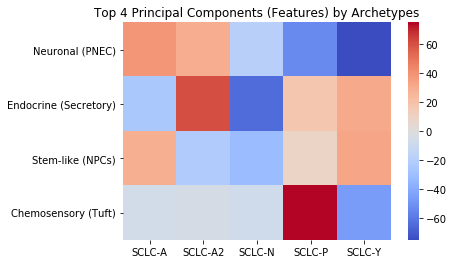

In [76]:
arc_hm = arc_pc.iloc[0:4]
arc_hm.index = ['Neuronal (PNEC)','Endocrine (Secretory)','Stem-like (NPCs)', 'Chemosensory (Tuft)']
sns.heatmap(arc_hm, cmap='coolwarm', vmin = -75, vmax = 75,)
plt.title('Top 4 Principal Components (Features) by Archetypes')
plt.show()

PC1:
- (+) NE (PNECs)
- (-) Non-NE (Mesenchymal)

PC2:
- (+) Endocrine (Secretory)
- (-) Neuronal (Nervous system development)


PC3:
- (+) Stem-like (NPCs) or neural mesenchyme
- (-) Differentiated cell

PC4:
- (+) Chemosensory (tuft)
- (-) Migratory

In [77]:
# pc_loadings.sort_values(2, ascending=False).head(20)
#     print(i)

Archetype space with labels for only cell lines with scRNA-seq (as a side note, PCA from MatLab automatically mean-centers the data before transforming and finding archetypes):

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


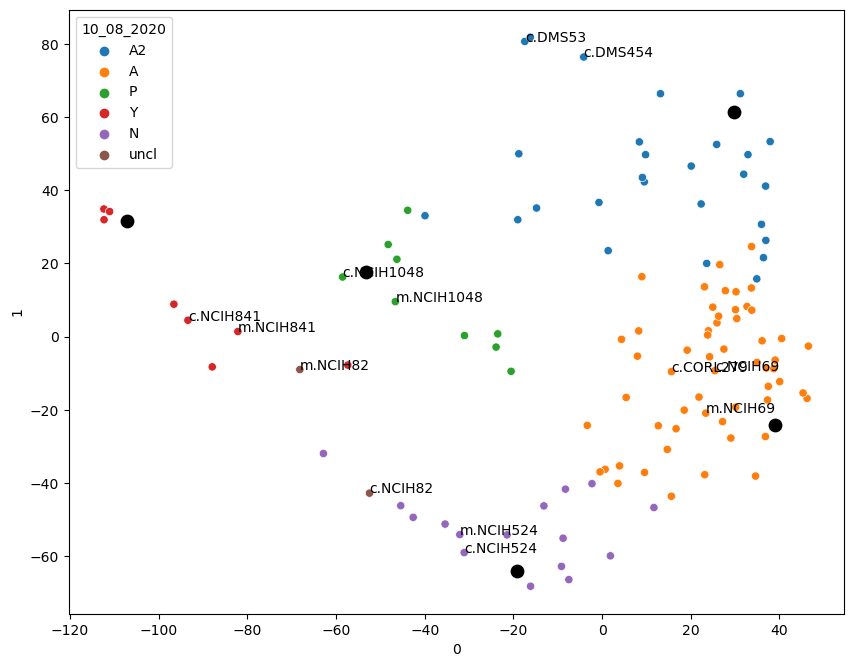

In [140]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    try:
        if label.split('.')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
        elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
    except IndexError: pass


Archetype space with all cell lines labeled, for reference:

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


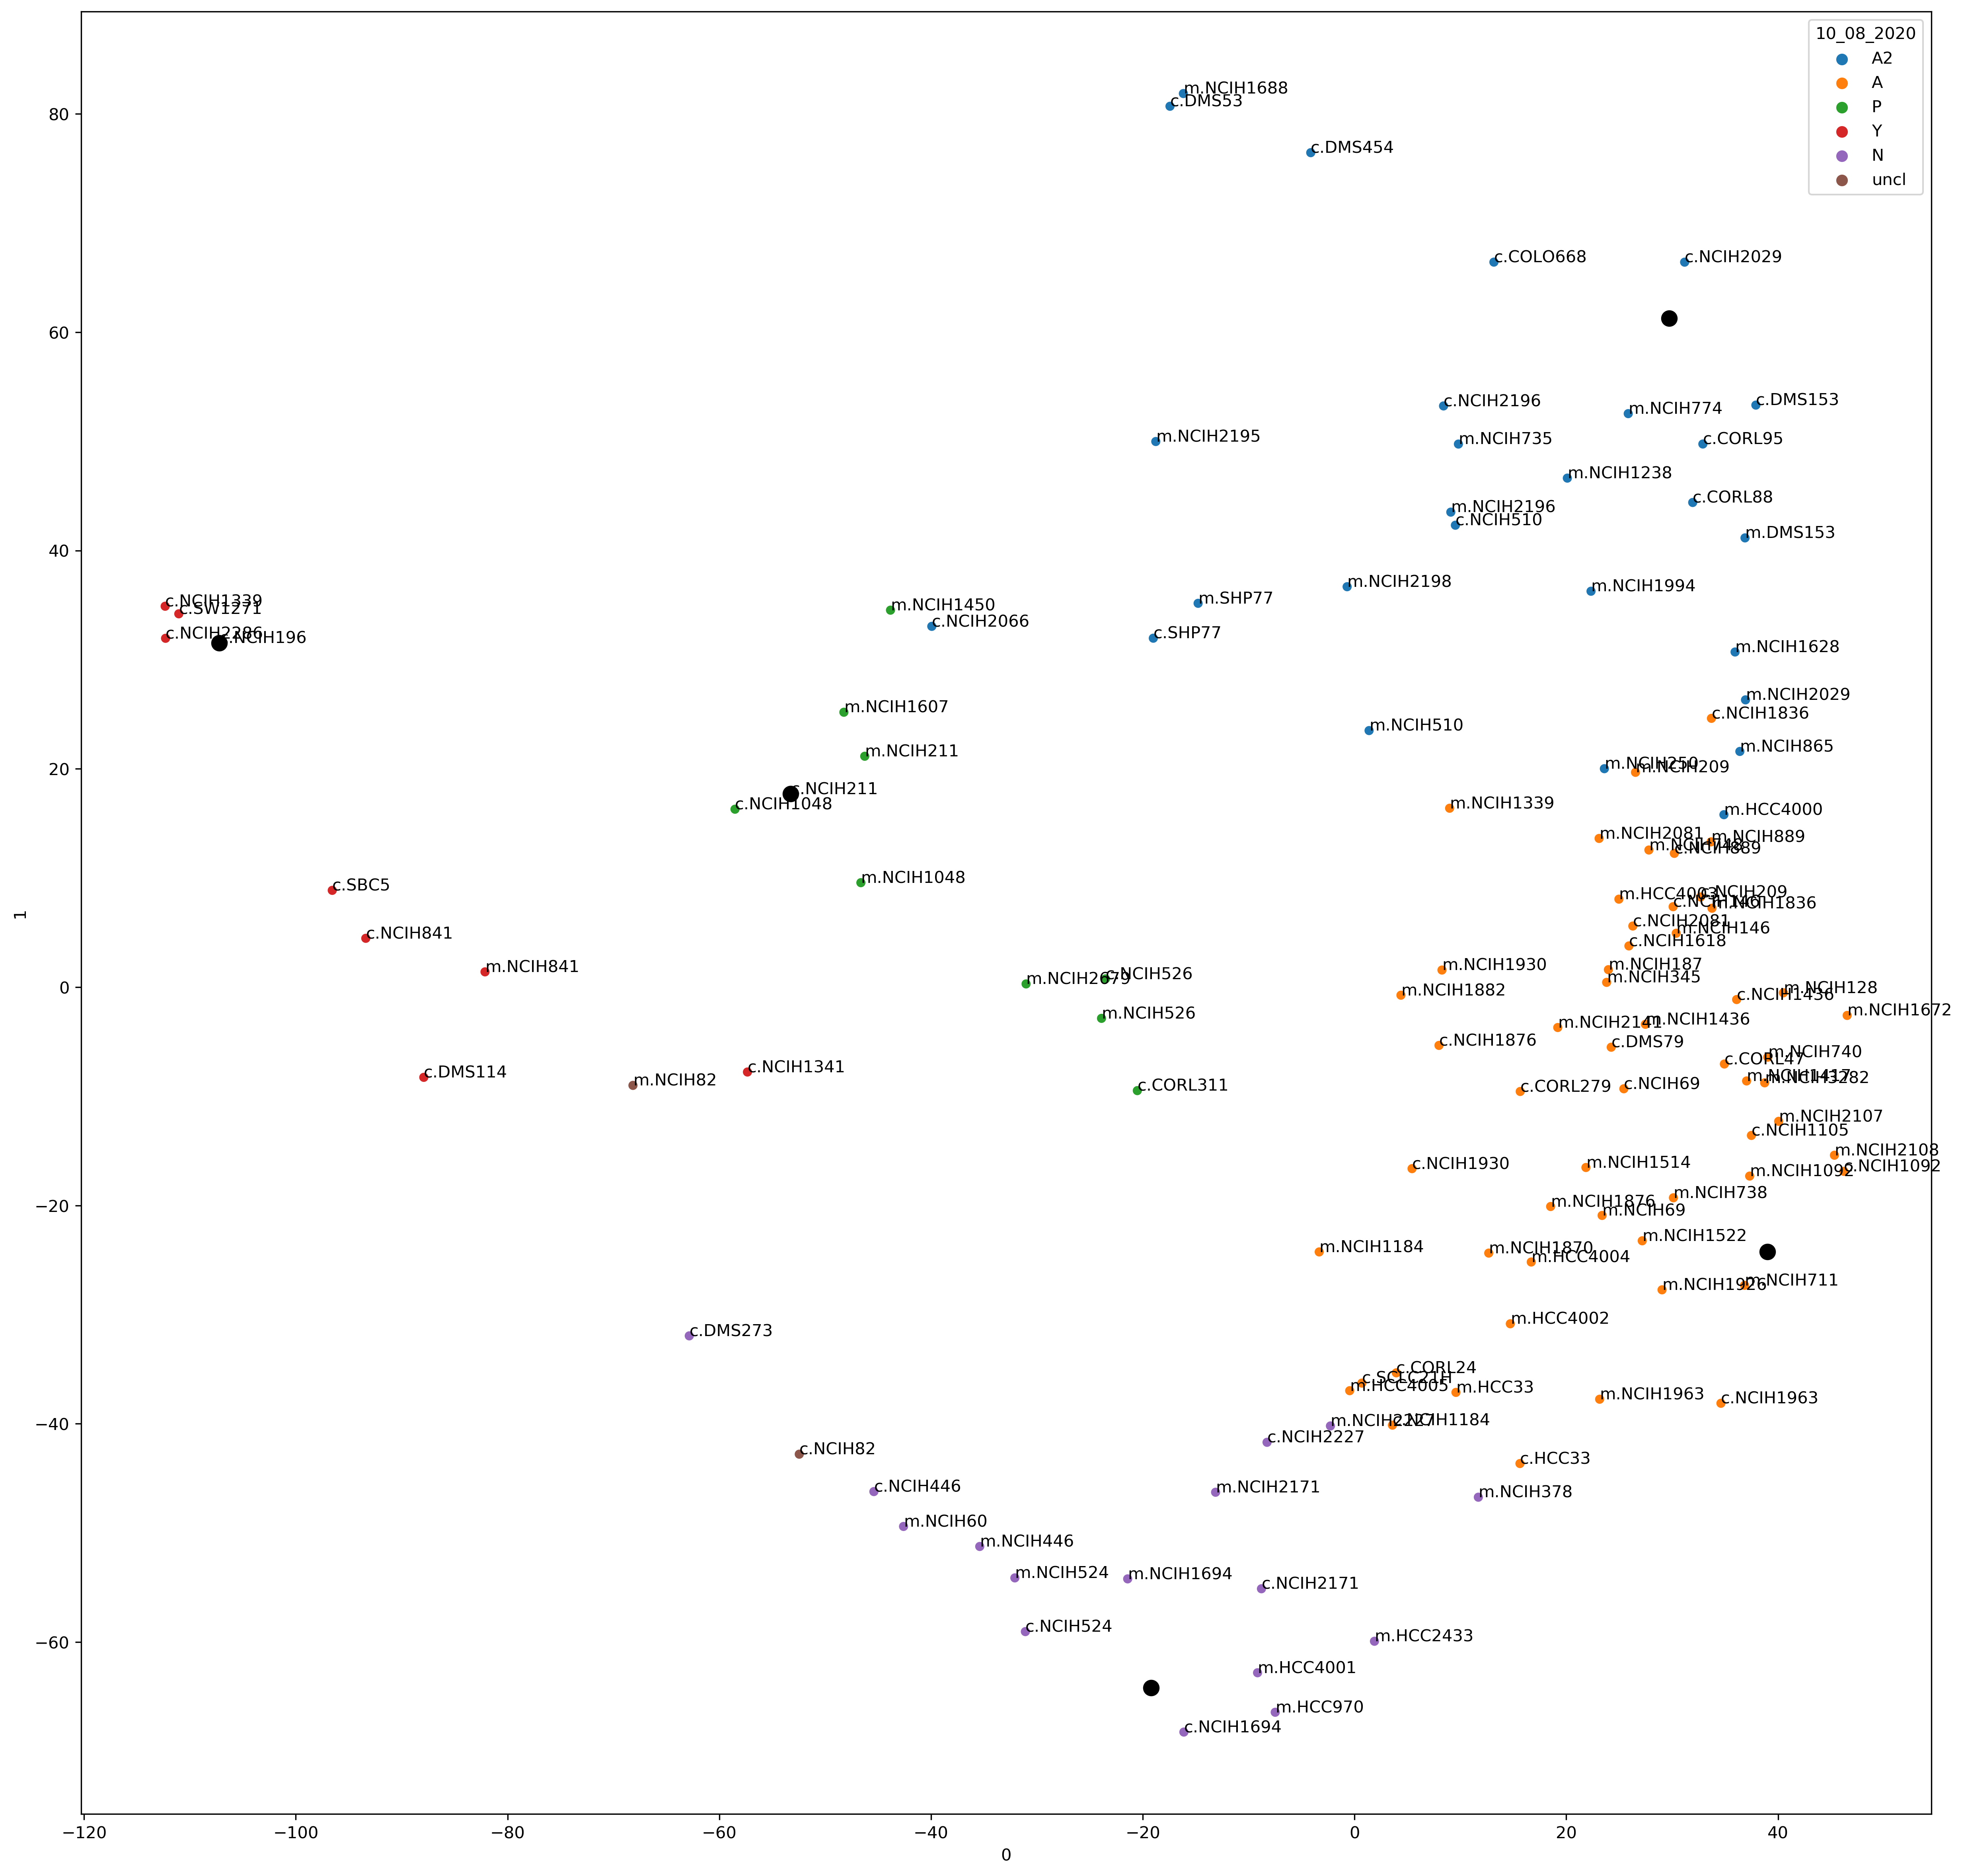

In [79]:
plt.figure(figsize = (20,20), dpi = 300)
sns.scatterplot(pcs[0],pcs[1], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[0],arc_pc.iloc[1], color = 'black', s = 80)
for (x,y, label) in zip(pcs[0],pcs[1],clines.index):
#     if label == "c.NCIH2081":
    plt.text(x,y,label)


... and corresponding scRNA-seq data transformed with the same PCA (after mean-centering the data):

In [84]:
import scanpy as sc
adata = sc.read_h5ad('../../int/clines/adata06.h5ad')

In [85]:
from sklearn import preprocessing as pp

sc_pc_genes = sorted(list(set(adata.var_names).intersection(pc_loadings.index)))
sc_pc_loadings = pc_loadings.loc[sc_pc_genes]
sc_data = data[sc_pc_genes]
adata_df = pd.DataFrame(adata.X.todense(), index=adata.obs_names, columns=adata.var_names)
adata_df = adata_df[sc_pc_genes]
adata_df = adata_df.T
adata_df_scale = pd.DataFrame(pp.scale(adata_df.T), columns = sc_pc_genes).T
adata_arc = sc_pc_loadings.T.dot(adata_df_scale)


/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


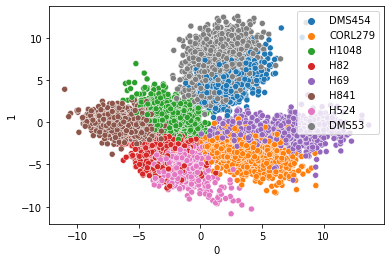

In [86]:
sns.scatterplot(adata_arc.loc[pcs_to_plot[0]],adata_arc.loc[pcs_to_plot[1]], hue = adata.obs['cline'].values)


We can see above that the single cell data from the cell lines approximately line up with the bulk RNA-seq data, with Y on the left, P in the middle, A2 at the top, N at the bottom, and A on the right.

Lastly, we'll plot tumor data on the archetype space:

In [135]:
tumors = pd.read_csv('lung_tpm_final.csv', index_col=0, header = 0)
tumors.head()

,S00022,S00035,S00050,S00213,S00356,S00472,S00501,S00825,S00827,S00829,...,S02351,S02352,S02353,S02354,S02360,S02375,S02376,S02378,S02382,S02397
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.971626,2.833514,2.792737,2.961507,2.955939,3.332214,2.889223,3.075778,2.814519,2.267827,...,3.206683,3.276152,4.133326,3.503443,3.136499,1.780874,1.561214,2.481569,2.205254,2.176689
A2M,4.653913,4.763524,5.248839,5.631358,6.150907,5.361458,5.857942,6.834538,5.650582,5.471909,...,4.944198,5.936320,5.708024,5.664792,4.711961,5.030952,4.757905,6.426368,5.815585,5.749103
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.030815,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.078949,0.000000,0.000000,0.000000,0.000000,0.000000,0.037669,0.000000,0.000000
A4GALT,3.186498,3.394310,2.871253,2.846558,2.216998,3.322920,3.929338,2.689807,2.914458,2.057248,...,3.434869,3.397004,3.769095,3.113416,2.863493,3.283889,2.422831,3.732642,3.563277,2.240693
AAAS,3.908311,3.309278,3.451605,3.151845,3.976601,3.999645,3.620763,3.354868,3.930432,3.609098,...,3.972863,3.795622,4.316948,4.141142,4.061237,4.007279,3.398061,3.489976,4.100482,3.743781


In [136]:
tumor_pc_genes = sorted(list(set(tumors.index).intersection(pc_loadings.index).intersection(set(adata.var_names))))
tumor_pc_loadings = pc_loadings.loc[tumor_pc_genes]
tumor_data = data[tumor_pc_genes]
tumors = tumors.loc[tumor_pc_genes]
tumors_scale = pd.DataFrame(pp.scale(tumors.T), columns = tumor_pc_genes).T
tumors_arc = tumor_pc_loadings.T.dot(tumors_scale)

In [133]:
from py_pcha import PCHA
XC, S, C, SSE, varexpl = PCHA(np.array(tumors_scale), noc=3, delta=1)
XC_pca = tumor_pc_loadings.T.dot(XC)

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


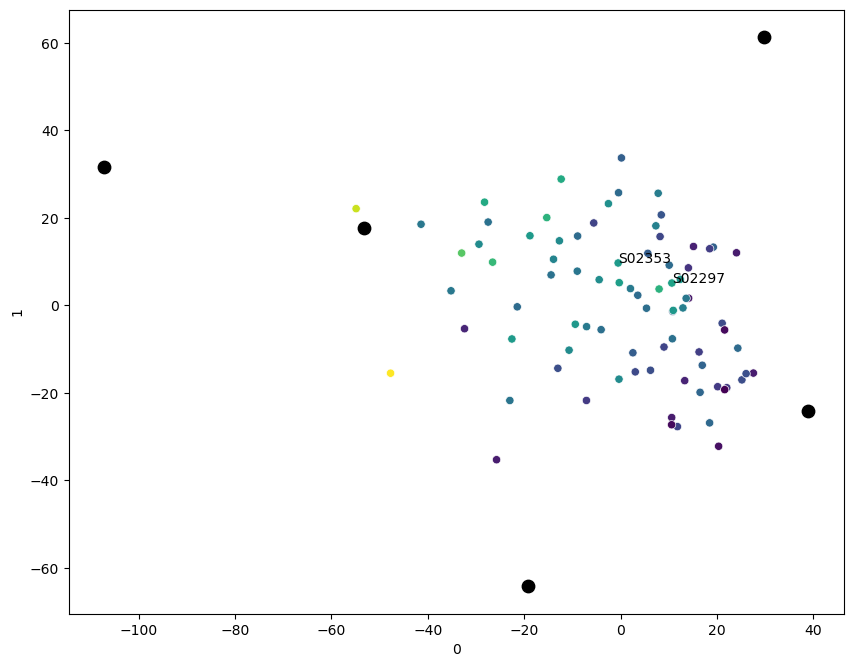

In [92]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
# sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], hue = clines['10_08_2020'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
# plt.scatter(np.array(XC_pca)[pcs_to_plot[0]],np.array(XC_pca)[pcs_to_plot[1]], color = 'red', s = 80)

sns.scatterplot(tumors_arc.loc[pcs_to_plot[0]],tumors_arc.loc[pcs_to_plot[1]], c = tumors.loc['YAP1'])
for (x,y, label) in zip(tumors_arc.loc[pcs_to_plot[0]],tumors_arc.loc[pcs_to_plot[1]],tumors.columns):
    if label in ['S02353','S02297']: #these two samples = chromothrypsis
        plt.text(x,y,label)



In [856]:
# n_sample = len(pcs.columns)
# total_var = (np.array(data.T)**2).sum(axis = None)/(n_sample-1)
# k = 50
# np.array([(np.array(pcs)[:, i]**2).sum()/(n_sample-1) for i in range(k)]).round(2)


In [857]:
# k = 81
# dx = 1
# X  = np.arange(0, k, dx)
# Y  = np.array([(np.array(tumors_arc)[:, i]**2).sum()/(n_sample-1) for i in range(k)]).round(2)


# # Normalize the data to a proper PDF
# Y /= (dx * Y).sum()

# # Compute the CDF
# CY = np.cumsum(Y * dx)

# # Plot both
# plt.plot(X, Y)
# plt.plot(X, CY, 'r--')


In [95]:
tumor_arc = pd.read_csv('./arc_space/thomas_tumors_arc.csv', index_col = 0, header = None)

In [96]:
tumor_arc

,1,2,3,4,5
0,,,,,
﻿A1BG,2.17,2.44,1.59,2.64,3.69
A2M,2.95,7.39,6.53,4.99,5.59
A2ML1,-0.12,0.10,0.16,0.15,0.06
A4GALT,1.58,3.48,2.53,3.08,2.91
AAAS,2.74,3.52,3.79,4.02,4.41
...,...,...,...,...,...
ZYG11A,0.15,1.25,1.41,1.72,2.14
ZYG11B,2.36,3.09,3.12,4.25,3.62
ZYX,1.10,5.23,4.47,3.50,3.96


In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
tumors = pd.read_csv('lung_tpm_final.csv', index_col=0, header = 0)

tumor_pca = pca.fit_transform(tumors.T)

In [115]:
tumor_arc_pca = pca.transform(tumor_arc.T)
tumor_arc_pca.shape



(5, 3)

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


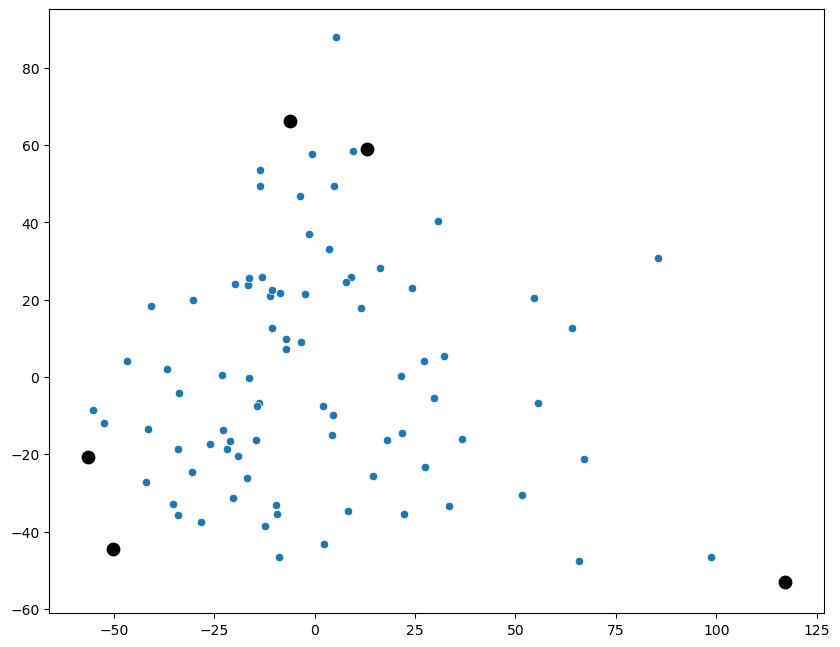

In [117]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(tumor_pca[:,pcs_to_plot[0]],tumor_pca[:,pcs_to_plot[1]])
plt.scatter(tumor_arc_pca[:,pcs_to_plot[0]],tumor_arc_pca[:,pcs_to_plot[1]], color = 'black', s = 80)


In [142]:
arc_genes = list(set(arc.index).intersection(set(tumor_arc.index)))

14516